<a href="https://colab.research.google.com/github/kanaka-22/IBM-HR-Analytics-Employee-Attrition-Performance/blob/main/Employee_Turn_Over_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset that is published by the Human Resource department of IBM is made available at Kaggle.
The factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv")
print (dataset.head)


<bound method NDFrame.head of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationFi

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<Axes: >

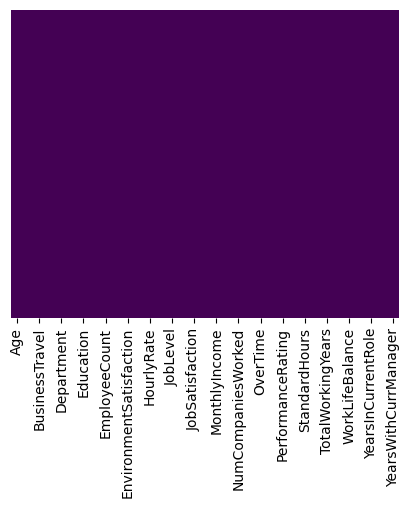

In [6]:
plt.figure(figsize =(5, 4))
sns.heatmap(dataset.isnull(),
            yticklabels = False,
            cbar = False,
            cmap ='viridis')

<Axes: xlabel='Attrition', ylabel='count'>

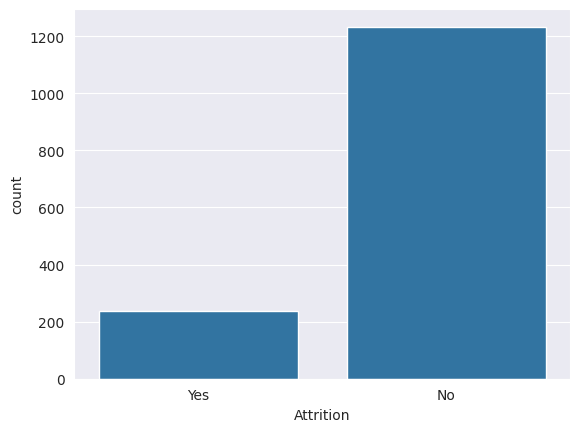

In [7]:
sns.set_style('darkgrid')
sns.countplot(x ='Attrition',
              data = dataset)

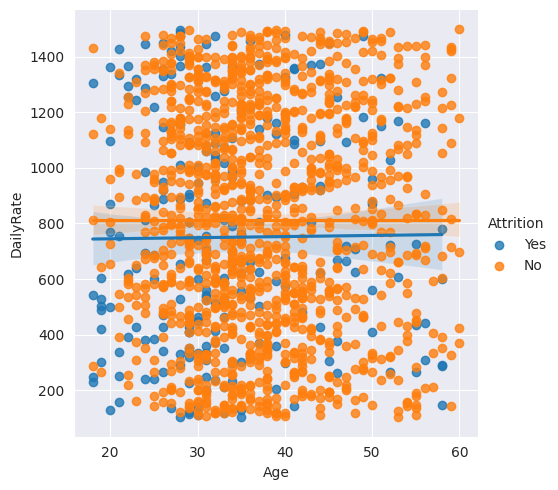

In [8]:
sns.lmplot(x = 'Age',
           y = 'DailyRate',
           hue = 'Attrition',
           data = dataset)

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

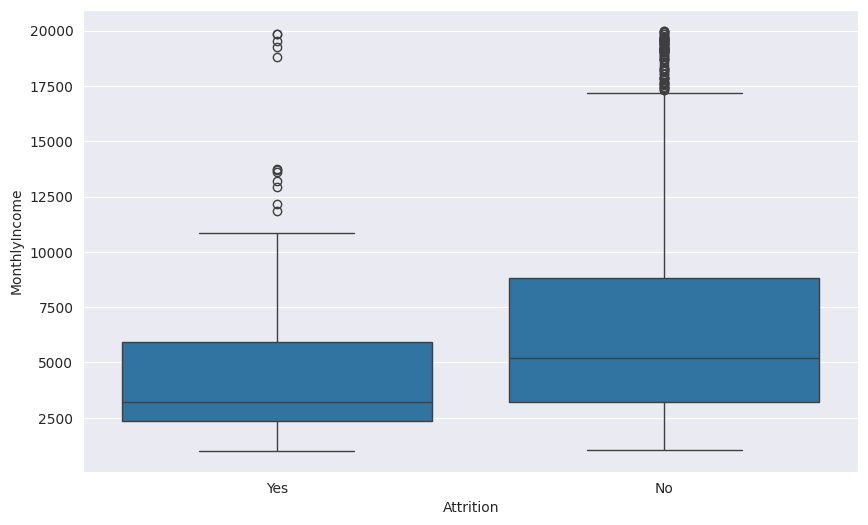

In [9]:
plt.figure(figsize =(10, 6))
sns.boxplot(y ='MonthlyIncome',
            x ='Attrition',
            data = dataset)

In [10]:
dataset.drop('EmployeeCount',
			axis = 1,
			inplace = True)
dataset.drop('StandardHours',
			axis = 1,
			inplace = True)
dataset.drop('EmployeeNumber',
			axis = 1,
			inplace = True)
dataset.drop('Over18',
			axis = 1,
			inplace = True)

print(dataset.shape)


(1470, 31)


In [11]:
y = dataset.iloc[:, 1]
X = dataset

X.drop('Attrition',
	axis = 1,
	inplace = True)


In [12]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)


In [14]:
dum_BusinessTravel = pd.get_dummies(dataset['BusinessTravel'],
									prefix ='BusinessTravel')

dum_Department = pd.get_dummies(dataset['Department'],
								prefix ='Department')

dum_EducationField = pd.get_dummies(dataset['EducationField'],
								prefix ='EducationField')

dum_Gender = pd.get_dummies(dataset['Gender'],
						prefix ='Gender', drop_first = True)

dum_JobRole = pd.get_dummies(dataset['JobRole'],

							prefix ='JobRole')

dum_MaritalStatus = pd.get_dummies(dataset['MaritalStatus'],

								prefix ='MaritalStatus')

dum_OverTime = pd.get_dummies(dataset['OverTime'],
							prefix ='OverTime', drop_first = True)



In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(

   X, y, test_size = 0.25, random_state = 40)

In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder


categorical_cols = X.select_dtypes(include=['object']).columns


encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical = encoder.fit_transform(X[categorical_cols])


encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_cols))


X = X.drop(categorical_cols, axis=1)
X = pd.concat([X.reset_index(drop=True), encoded_categorical_df.reset_index(drop=True)], axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)


rf = RandomForestClassifier(n_estimators=10, criterion='entropy')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("Train Result:")
        print("------------")
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        print("----------------------------------------------------------")

    else:
        print("Test Result:")
        print("-----------")
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("-----------------------------------------------------------")


print_score(rf, X_train, y_train, X_test, y_test, train=True)
print_score(rf, X_train, y_train, X_test, y_test, train=False)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Train Result:
------------
Classification Report: 
                    precision    recall  f1-score   support

       Non-Travel       1.00      1.00      1.00       116
Travel_Frequently       1.00      1.00      1.00       217
    Travel_Rarely       1.00      1.00      1.00       769

         accuracy                           1.00      1102
        macro avg       1.00      1.00      1.00      1102
     weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[116   0   0]
 [  0 217   0]
 [  0   0 769]]

Average Accuracy: 	 0.9846
Accuracy SD: 		 0.0187
----------------------------------------------------------
Test Result:
-----------
Classification Report: 
                    precision    recall  f1-score   support

       Non-Travel       1.00      0.85      0.92        34
Travel_Frequently       0.97      1.00      0.98        60
    Travel_Rarely       0.99      1.00      0.99       274

         accuracy                           0.99       368
        

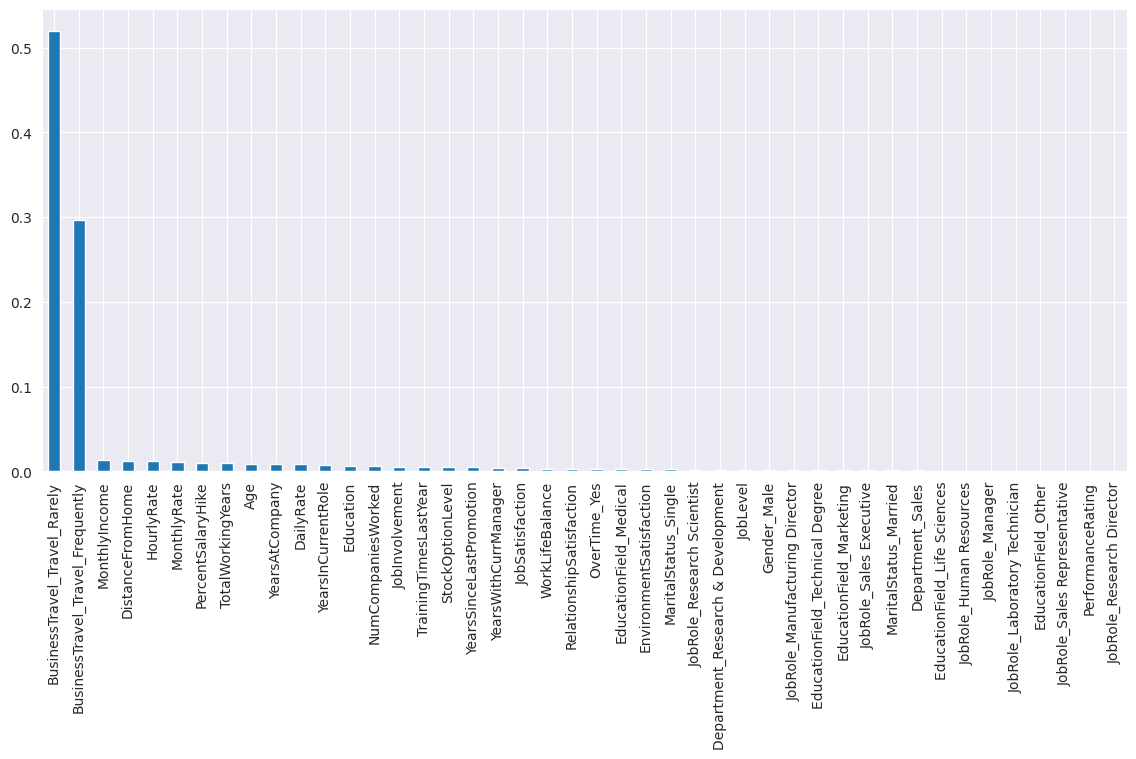

In [31]:
pd.Series(rf.feature_importances_,
		index = X.columns).sort_values(ascending = False).plot(kind = 'bar',
																figsize = (14,6));


So, According to Random forest classifier the most important feature for predicting the result and employees are most likely to leave the company BusinessTravel_Rarely.